## Venta de licores en Iowa

Este conjunto de datos contiene información sobre las compras de bebidas alcohólicas de los licenciatarios de bebidas alcohólicas de clase “E” de Iowa por producto y fecha de compra desde el 1 de enero de 2012 hasta la actualidad. El conjunto de datos se puede utilizar para analizar las ventas totales de bebidas alcohólicas en Iowa de productos individuales a nivel de tienda.

La licencia de licor clase E, para tiendas de comestibles, licorerías, tiendas de conveniencia, etc., permite a los establecimientos comerciales vender licor para consumo fuera del local en envases originales sin abrir.

Database url: httpscatalog.data.gov

In [2]:
# Importar librerías
import pandas as pd
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


import warnings
warnings.filterwarnings('ignore')

In [3]:
try:
    # Leer el archivo CSV ubicado en la ruta especificada y asigna los datos a la variable df_resultados
    ruta = "C:/Users/delahozce/OneDrive - GLOBAL HITSS/Documentos/Proyectos/Codes/git_portafolio/Portafolio/data/proyecto/"
    iowa_liquor = pd.read_csv(ruta + "httpscatalog.data.gov/Venta_licores_Iowa/Iowa_Liquor_Sales.csv") 

    # Si la lectura del archivo es exitosa, imprime un mensaje indicando que el dataset se cargó correctamente
    print("El dataset se cargó exitosamente")

# Si se produce un error específico de "FileNotFoundError" (archivo no encontrado), ejecuta este bloque de código
except FileExistsError as e:

    # Imprime un mensaje de error personalizado indicando que el archivo no se pudo encontrar, junto con los detalles específicos del error
    print(f"Error: El archivo no se puede encontrar. Detalles: {e}")

# Si se produce cualquier otro tipo de error, ejecuta este bloque de código
except Exception as e:

    # Imprime un mensaje de error genérico indicando que ocurrió un error inesperado, junto con los detalles específicos del error
    print(f"Error inesperado: {e}")

El dataset se cargó exitosamente


In [4]:
# Dimensión y visualización de las primera 5 filas del dataframe
print(iowa_liquor.shape)
iowa_liquor.head(5)

(30082002, 24)


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name,Vendor Number,Vendor Name,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,INV-05257100062,06/01/2017,3420,SAM'S CLUB 6344 / WINDSOR HEIGHTS,NaN,NaN,NaN,NaN,NaN,NaN,1081500.00,TRIPLE SEC,65.00,JIM BEAM BRANDS,86112,DEKUYPER TRIPLE SEC,12,1000,2.33,3.50,12,42.00,12.00,3.17
1,INV-05330600018,06/05/2017,4777,CASEY'S GENERAL STORE #1365 / PAULLINA,NaN,NaN,NaN,NaN,NaN,NaN,1062400.00,SPICED RUM,260.00,DIAGEO AMERICAS,43285,CAPTAIN MORGAN ORIGINAL SPICED RUM PET,12,750,9.06,13.59,12,163.08,9.00,2.38
2,INV-05332000056,06/05/2017,2591,HY-VEE WINE AND SPIRITS / ATLANTIC,NaN,NaN,NaN,NaN,NaN,NaN,1032100.00,IMPORTED VODKAS,395.00,PROXIMO,34935,THREE OLIVES 80PRF,12,750,9.96,14.94,2,29.88,1.50,0.40
3,INV-05324100034,06/05/2017,5091,KUM & GO #436 / MUSCATINE,NaN,NaN,NaN,NaN,NaN,NaN,1031100.00,AMERICAN VODKAS,205.00,E & J GALLO WINERY,36969,NEW AMSTERDAM VODKA,12,750,7.50,11.25,6,67.50,4.50,1.19
4,INV-05319800042,06/05/2017,5320,CENTRAL GROCERY,NaN,NaN,NaN,NaN,NaN,NaN,1081400.00,AMERICAN SCHNAPPS,434.00,LUXCO INC,80574,ARROW PEPPERMINT SCHNAPPS,24,375,2.26,3.39,3,10.17,1.12,0.30


In [5]:
# Convertir la columna 'Date' a tipo datetime
iowa_liquor['Date'] = pd.to_datetime(iowa_liquor['Date'])

In [6]:
# Se crea un DataFrame nuevo, utilizando los datos existentes del dataset tomando el ranog de fecha del 2019 al 2022
# Filtrar las filas donde las fechas estén entre 2019 y 2022
df_filtrado = iowa_liquor[(iowa_liquor['Date'] >= '2019-01-01') & (iowa_liquor['Date'] <= '2022-12-31')]
print(df_filtrado.shape)

(10181987, 24)


In [7]:
# Exclusión de Columnas que son identificadores únicos
drop_cols = ['Invoice/Item Number','Store Number','Address','City','Zip Code','Store Location','County Number','Vendor Number','Category','Item Number']
df_filtrado.drop(drop_cols, axis=1, inplace=True)
df_filtrado = df_filtrado.reset_index(drop=True)
df_filtrado.head(3)

,Date,Store Name,County,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2019-02-07,WAL-MART 1732 / DENISON,CRAWFORD,IMPORTED VODKAS,JIM BEAM BRANDS,PINNACLE,6,1750,12.59,18.89,6,113.34,10.50,2.77
1,2019-02-13,KUM & GO #1215 / AMES,STORY,AMERICAN VODKAS,LUXCO INC,HAWKEYE VODKA,6,1750,7.17,10.76,6,64.56,10.50,2.77
2,2019-06-10,HILLTOP GROCERY,SCOTT,CANADIAN WHISKIES,CONSTELLATION BRANDS INC,BLACK VELVET,48,200,1.56,2.34,48,112.32,9.60,2.53


In [8]:
# Filtrado de los condados objetivo del proyecto : Polk, linn, scott, jhonson que presentan mayores ventas
condados = ['POLK','LINN','SCOTT','JOHNSON']

# Filtrar el DataFrame basado en esas categorías
df_filtrado = df_filtrado[df_filtrado['County'].isin(condados)]
df_filtrado.shape

(3871596, 14)

In [9]:
df_filtrado.to_csv('iowa_liquor_sales_filtered.csv',index=False)

In [8]:
del iowa_liquor

## Análisis básico inicial del conjunto de datos

Revisar la estructura del conjunto de datos filtrado para: 
- Identificar valores faltantes, valores atípicos y posibles inconsistencias en los datos.

In [9]:
# Identificación tipo de dato de cada columna
print("--- Visión general de los datos ---")
df_filtrado.info()

--- Visión general de los datos ---
<class 'pandas.core.frame.DataFrame'>
Index: 3871596 entries, 2 to 10181985
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   datetime64[ns]
 1   Store Name             object        
 2   County                 object        
 3   Category Name          object        
 4   Vendor Name            object        
 5   Item Description       object        
 6   Pack                   int64         
 7   Bottle Volume (ml)     int64         
 8   State Bottle Cost      float64       
 9   State Bottle Retail    float64       
 10  Bottles Sold           int64         
 11  Sale (Dollars)         float64       
 12  Volume Sold (Liters)   float64       
 13  Volume Sold (Gallons)  float64       
dtypes: datetime64[ns](1), float64(5), int64(3), object(5)
memory usage: 443.1+ MB


In [10]:
# Verificar valores nulos por columna
print("\n--- Verificación de valores nulos ---")
datos_faltantes = df_filtrado.isnull().sum()
porcentaje_faltas = (df_filtrado.isnull().sum() / len(df_filtrado)) * 100

faltantes_df = pd.DataFrame({
    'Valores faltantes': datos_faltantes,
    'Porcentaje (%)' : porcentaje_faltas
})

# Ordernar de manera descendente por %
faltantes_df = faltantes_df.sort_values(by='Porcentaje (%)', ascending=False)
faltantes_df


--- Verificación de valores nulos ---


,Valores faltantes,Porcentaje (%)
Category Name,1491,0.04
Vendor Name,4,0.00
Date,0,0.00
Store Name,0,0.00
County,0,0.00
Item Description,0,0.00
Pack,0,0.00
Bottle Volume (ml),0,0.00
State Bottle Cost,0,0.00
State Bottle Retail,0,0.00


### Exploración variables numéricas y su correlaciones

In [11]:
# Descripción estadística de las variables numéricas
print("\n--- Estadísticas descriptivas: ---")
df_filtrado.describe()


--- Estadísticas descriptivas: ---


,Date,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,3871596,3871596.00,3871596.00,3871596.00,3871596.00,3871596.00,3871596.00,3871596.00,3871596.00
mean,2021-01-14 03:53:01.634860800,12.58,781.37,11.36,17.04,13.54,184.13,10.29,2.71
min,2019-01-02 00:00:00,1.00,20.00,0.33,0.50,-156.00,-3375.00,-156.00,-41.21
25%,2020-01-27 00:00:00,6.00,375.00,5.50,8.25,3.00,44.12,1.50,0.39
50%,2021-01-13 00:00:00,12.00,750.00,8.74,13.11,6.00,90.00,4.80,1.26
75%,2022-01-05 00:00:00,12.00,750.00,14.00,21.00,12.00,178.92,9.60,2.53
max,2022-12-30 00:00:00,60.00,6000.00,2298.84,3448.26,13200.00,250932.00,13200.00,3487.07
std,NaN,8.55,511.59,12.36,18.53,42.16,699.68,46.03,12.16



--- Frecuencias columnas numericas ---
Pack


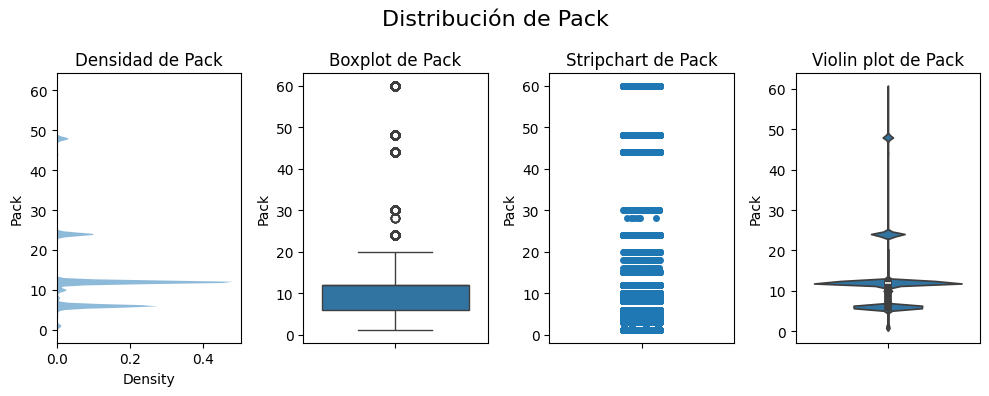

Bottle Volume (ml)


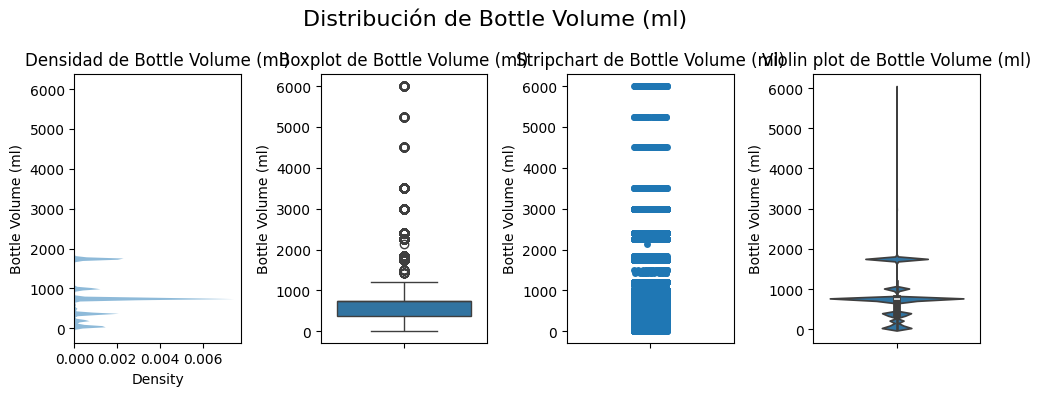

State Bottle Cost


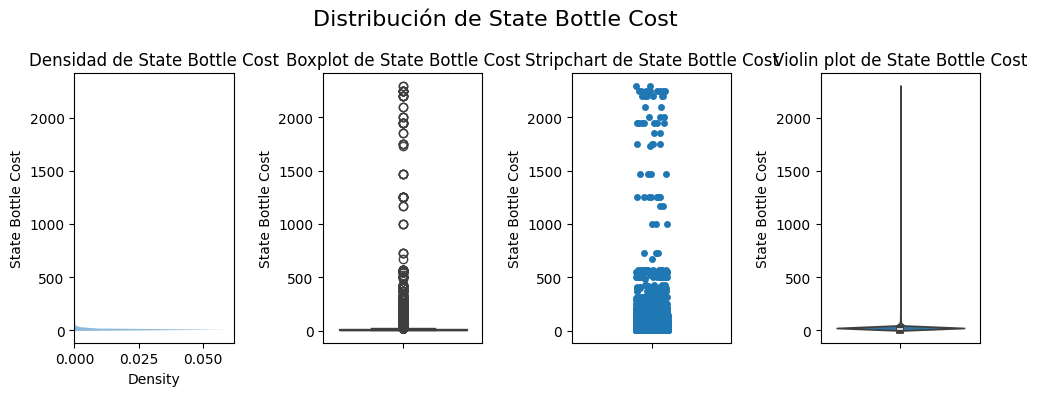

State Bottle Retail


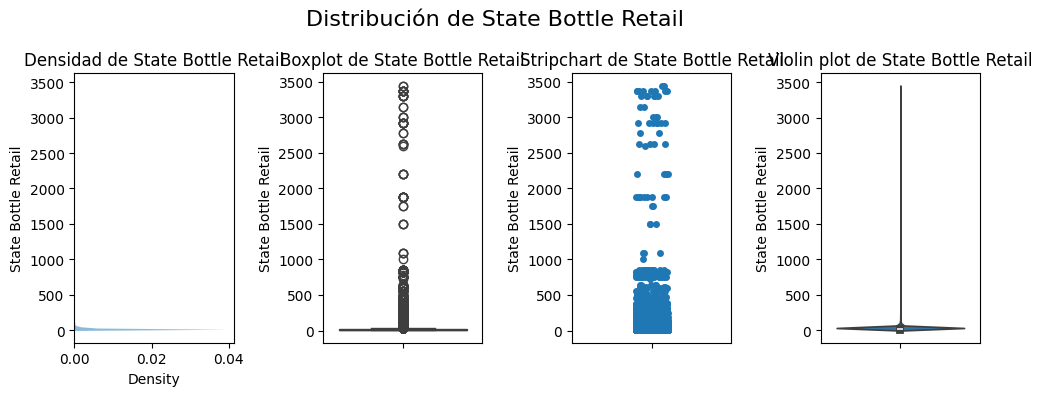

Bottles Sold


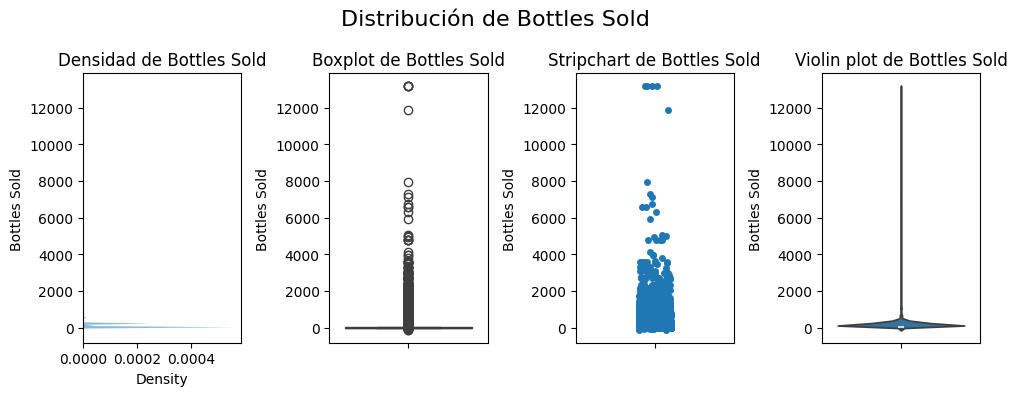

Sale (Dollars)


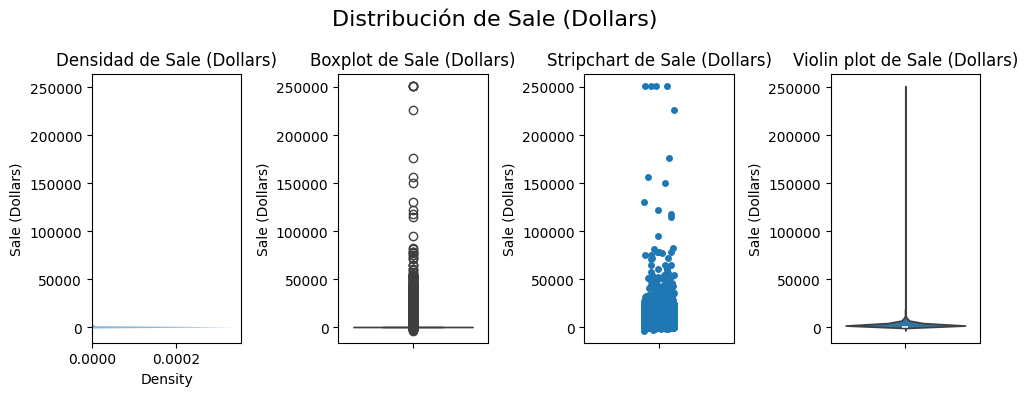

Volume Sold (Liters)


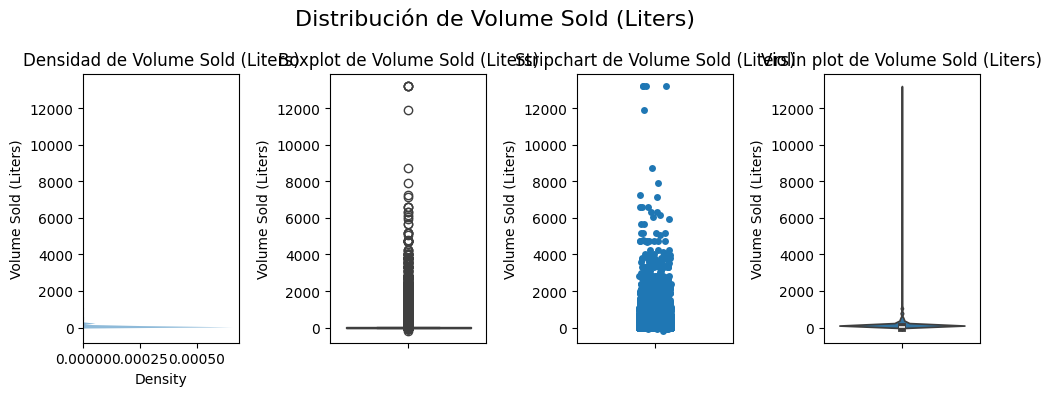

Volume Sold (Gallons)


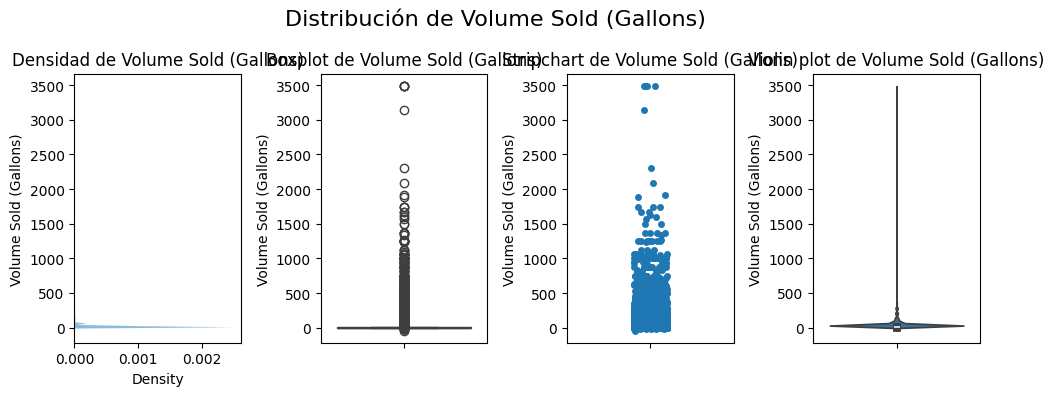

In [12]:
# Análisis de variables numéricas
# Distribuciones: densidad, boxplot, astripchart, violinplot:
print("\n--- Frecuencias columnas numericas ---")
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de densidad, boxplot, stripchart y violin plot:
num_columns = df_filtrado.select_dtypes(include=['int64', 'float64']).columns

for i in num_columns:
    fig, axs = plt.subplots(ncols=4, figsize=(10, 4))
    
    # Histograma de densidad (KDE plot)
    sns.kdeplot(data=df_filtrado, y=i, fill=True, common_norm=False, palette="crest",
                alpha=.5, linewidth=0, ax=axs[0])
    axs[0].set_title(f'Densidad de {i}')
    
    # Boxplot
    sns.boxplot(data=df_filtrado, y=i, ax=axs[1])
    axs[1].set_title(f'Boxplot de {i}')
    
    # Stripchart
    sns.stripplot(y=i, data=df_filtrado, ax=axs[2])
    axs[2].set_title(f'Stripchart de {i}')
    
    # Violin plot
    sns.violinplot(data=df_filtrado, y=i, ax=axs[3])
    axs[3].set_title(f'Violin plot de {i}')
    
    fig.suptitle(f'Distribución de {i}', fontsize=16)
    fig.tight_layout()
    print(i)
    plt.show()


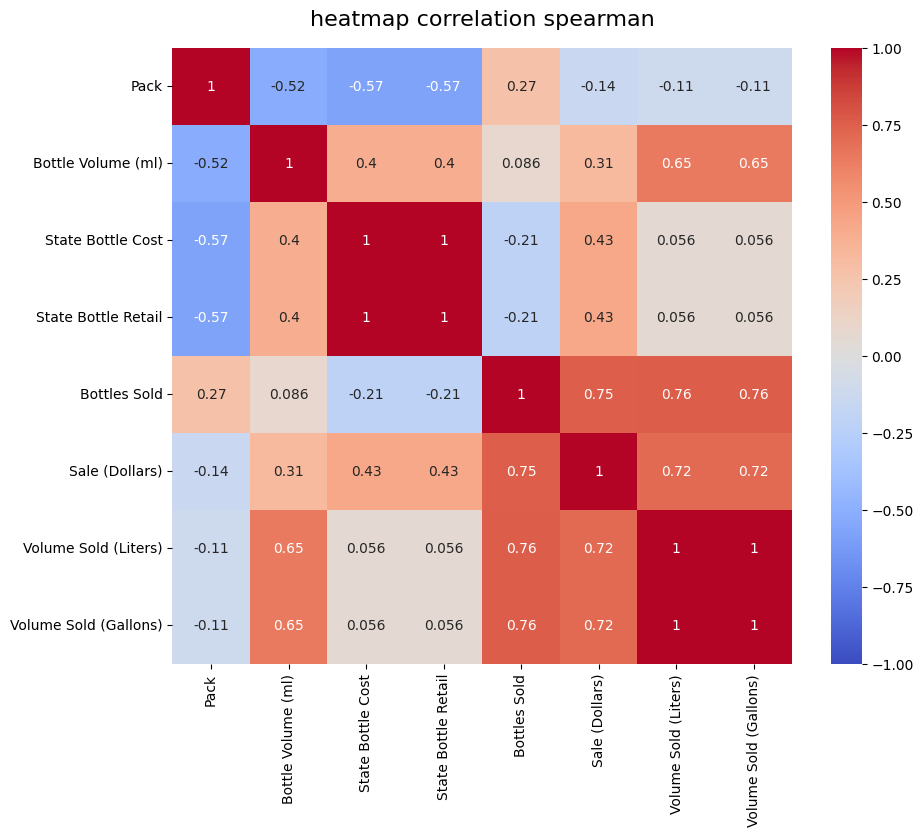

In [14]:
# Calcula la correlación
corr_matrix = df_filtrado[num_columns].corr(method='spearman')
# Crea el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('heatmap correlation spearman', fontdict={'fontsize':16}, pad=16)
plt.show()

### Exploración variables Categoricas

In [15]:
# Descripción de las variables categóricas
print("\n--- Estadísticas descriptivas variables categoricas: ---")
df_filtrado.describe(include=['object'])


--- Estadísticas descriptivas variables categoricas: ---


,Store Name,County,Category Name,Vendor Name,Item Description
count,3871596,3871596,3870105,3871592,3871596
unique,690,4,49,315,6260
top,HY-VEE #3 / BDI / DES MOINES,POLK,AMERICAN VODKAS,DIAGEO AMERICAS,TITOS HANDMADE VODKA
freq,73796,1922221,613998,612977,90370


In [16]:
# Identificar valores únicos por columna
cat_columns = df_filtrado.select_dtypes(include=['object']).columns

print("\n--- Valores únicos por columna: ---")
for column in cat_columns:
    unique_values = df_filtrado[column].unique()
    print(f"\n{column} ({len(unique_values)} valores únicos):\n{unique_values[:10]}")
    if len(unique_values) > 10:
        print("...")


--- Valores únicos por columna: ---

Store Name (690 valores únicos):
['HILLTOP GROCERY' 'HY-VEE / WINDSOR HEIGHTS'
 'HY-VEE FOOD STORE #3 / DES MOINES' 'HY-VEE FOOD STORE / MARION'
 'GD XPRESS / DAVENPORT' 'PRAIRIE MEADOWS' 'THE DEPOT NORTH LIBERTY'
 'HY-VEE FOOD STORE #2 / IOWA CITY' 'QUIK TRIP #500 / HUBBELL DM' 'SAUCE']
...

County (4 valores únicos):
['SCOTT' 'POLK' 'LINN' 'JOHNSON']

Category Name (50 valores únicos):
['CANADIAN WHISKIES' 'IMPORTED BRANDIES' 'IRISH WHISKIES'
 'AMERICAN VODKAS' 'AMERICAN SCHNAPPS' 'FLAVORED RUM'
 'IMPORTED CORDIALS & LIQUEURS' 'MIXTO TEQUILA' 'CREAM LIQUEURS'
 'WHISKEY LIQUEUR']
...

Vendor Name (316 valores únicos):
['CONSTELLATION BRANDS INC' 'MOET HENNESSY USA' 'PERNOD RICARD USA'
 'LUXCO INC' 'BACARDI USA INC' 'DIAGEO AMERICAS' 'HOOD RIVER DISTILLERS'
 'MHW LTD' 'SAZERAC COMPANY  INC' 'WILLIAM GRANT & SONS INC']
...

Item Description (6260 valores únicos):
['BLACK VELVET' 'HENNESSY VS' 'JAMESON' 'HAWKEYE VODKA'
 'ARROW PEPPERMINT SCHNAPPS' 'P


--- Frecuencias columnas categoricas ---
*************************************************
Variable = Store Name
*************************************************
                                                    Frecuencias Relativas  \
Store Name                                                                  
HY-VEE #3 / BDI / DES MOINES                                         0.02   
CENTRAL CITY 2                                                       0.02   
CENTRAL CITY LIQUOR, INC.                                            0.02   
HY-VEE #7 / CEDAR RAPIDS                                             0.01   
HY-VEE WINE AND SPIRITS / BETTENDORF                                 0.01   
BENZ DISTRIBUTING                                                    0.01   
HY-VEE FOOD STORE / CORALVILLE                                       0.01   
HY-VEE FOOD STORE #2 / STATE ANKENY                                  0.01   
HY-VEE #4 / WDM                                                   

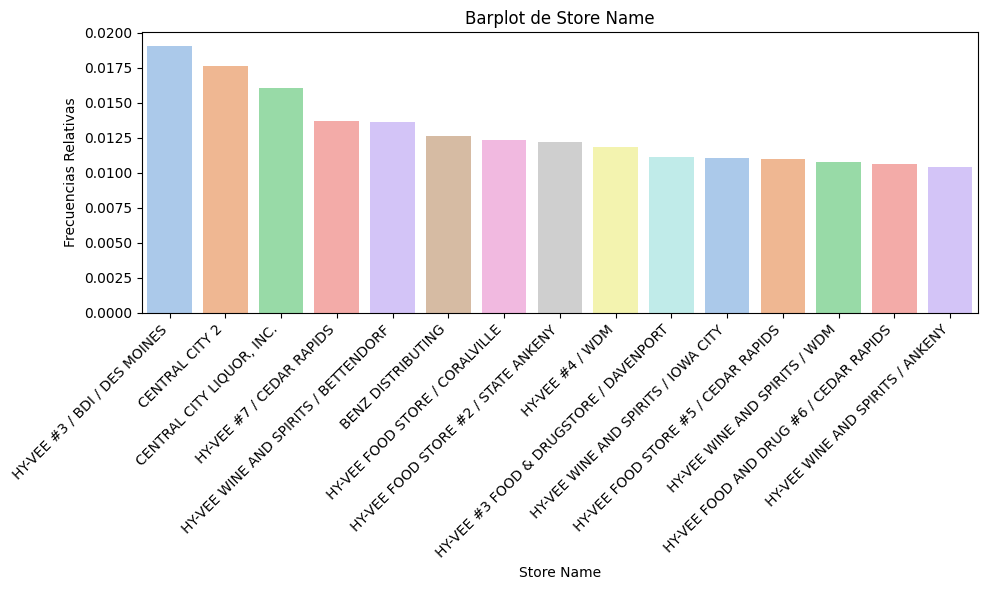

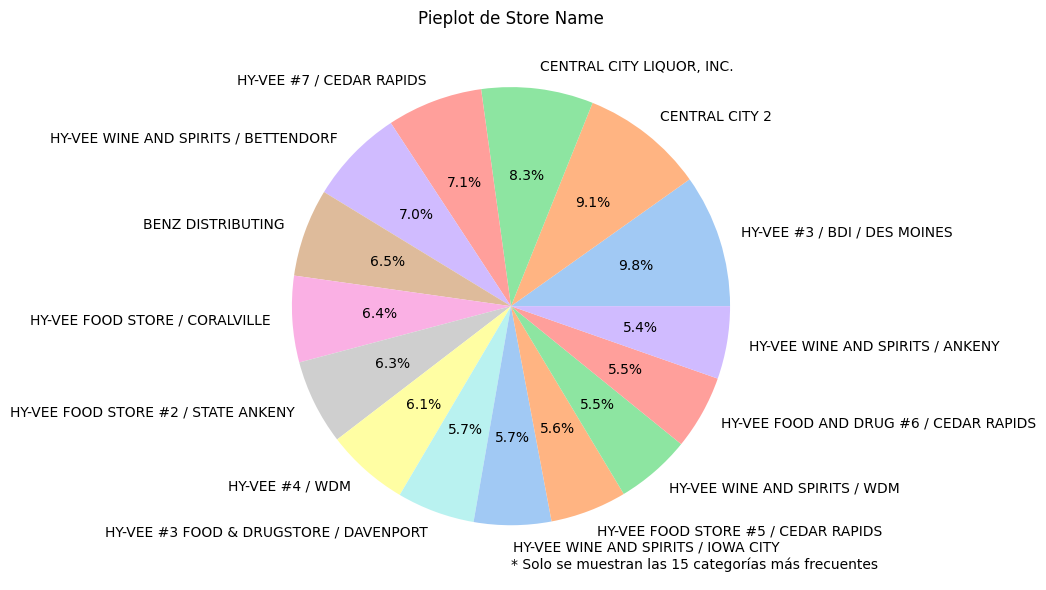

*************************************************
Variable = County
*************************************************
         Frecuencias Relativas  Frecuencias Absolutas
County                                               
POLK                      0.50                1922221
LINN                      0.22                 851736
SCOTT                     0.15                 596098
JOHNSON                   0.13                 501541


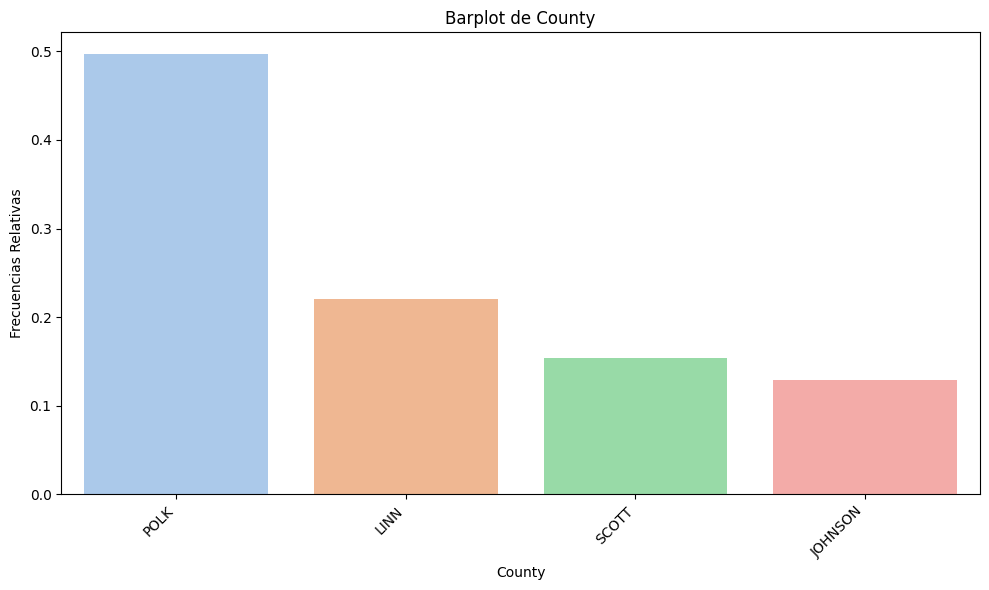

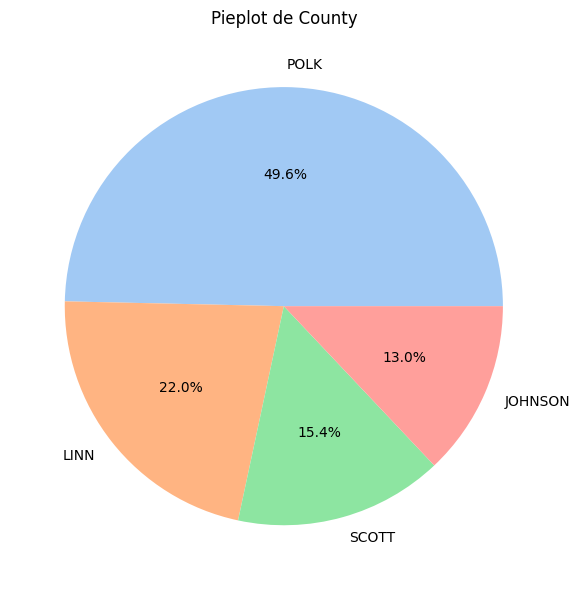

*************************************************
Variable = Category Name
*************************************************
                                      Frecuencias Relativas  \
Category Name                                                 
AMERICAN VODKAS                                        0.16   
CANADIAN WHISKIES                                      0.08   
STRAIGHT BOURBON WHISKIES                              0.07   
WHISKEY LIQUEUR                                        0.05   
AMERICAN FLAVORED VODKA                                0.05   
100% AGAVE TEQUILA                                     0.04   
SPICED RUM                                             0.04   
BLENDED WHISKIES                                       0.04   
IMPORTED VODKAS                                        0.03   
COCKTAILS/RTD                                          0.03   
IMPORTED BRANDIES                                      0.03   
AMERICAN BRANDIES                                      0

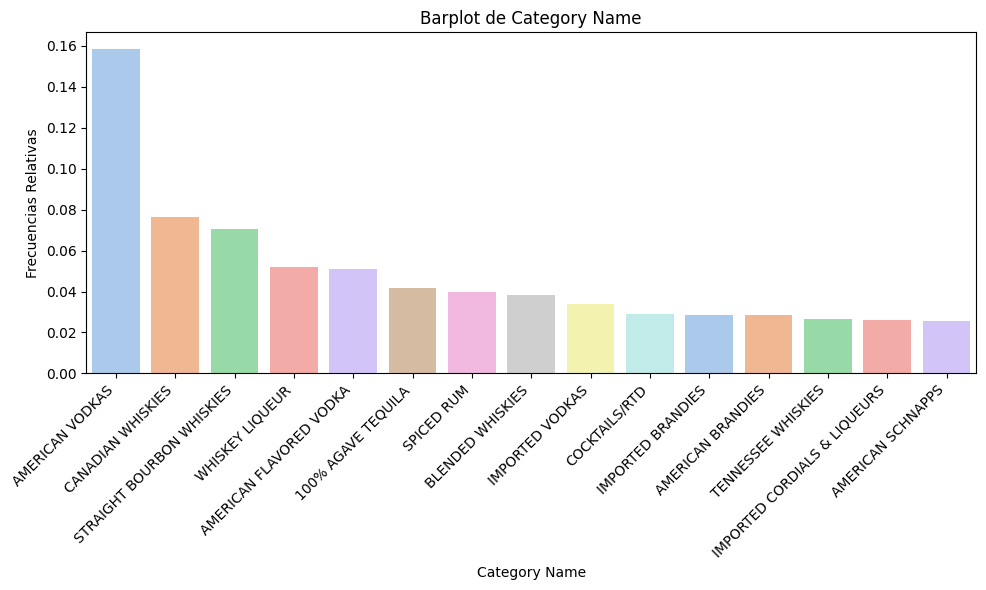

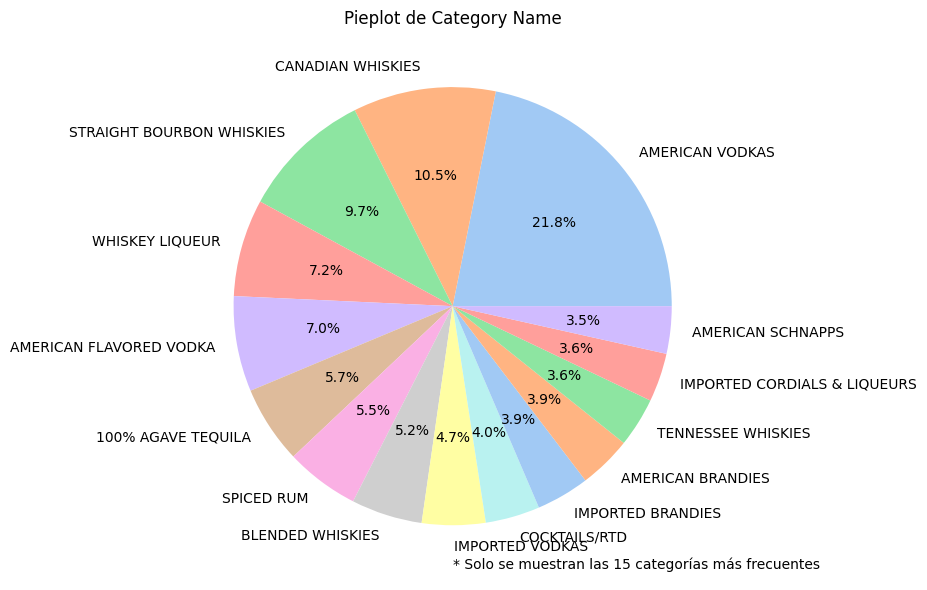

*************************************************
Variable = Vendor Name
*************************************************
                                                    Frecuencias Relativas  \
Vendor Name                                                                 
DIAGEO AMERICAS                                                      0.16   
SAZERAC COMPANY  INC                                                 0.11   
JIM BEAM BRANDS                                                      0.08   
HEAVEN HILL BRANDS                                                   0.06   
LUXCO INC                                                            0.06   
PERNOD RICARD USA                                                    0.06   
E & J GALLO WINERY                                                   0.05   
BACARDI USA INC                                                      0.05   
PROXIMO                                                              0.04   
BROWN FORMAN CORP.            

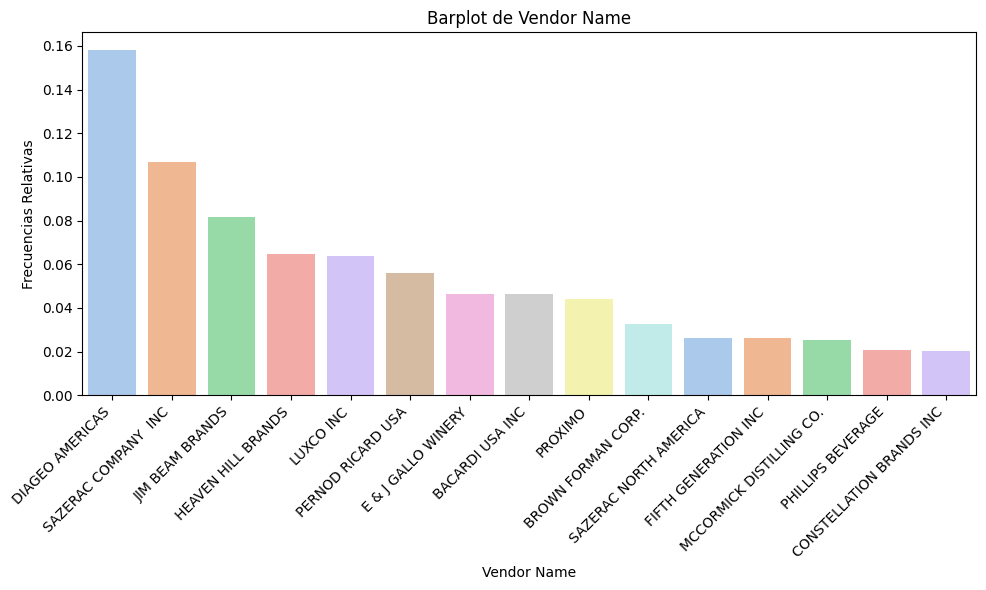

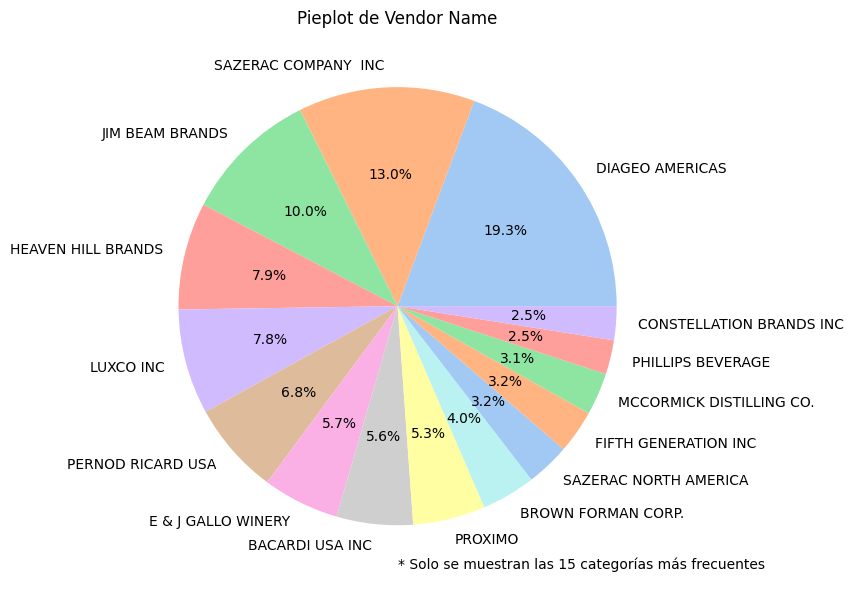

*************************************************
Variable = Item Description
*************************************************
                                                    Frecuencias Relativas  \
Item Description                                                            
TITOS HANDMADE VODKA                                                 0.02   
BLACK VELVET                                                         0.02   
FIREBALL CINNAMON WHISKEY                                            0.02   
HAWKEYE VODKA                                                        0.02   
HENNESSY VS                                                          0.01   
SMIRNOFF 80PRF                                                       0.01   
CROWN ROYAL                                                          0.01   
CAPTAIN MORGAN ORIGINAL SPICED                                       0.01   
CROWN ROYAL REGAL APPLE                                              0.01   
NEW AMSTERDAM 80PRF      

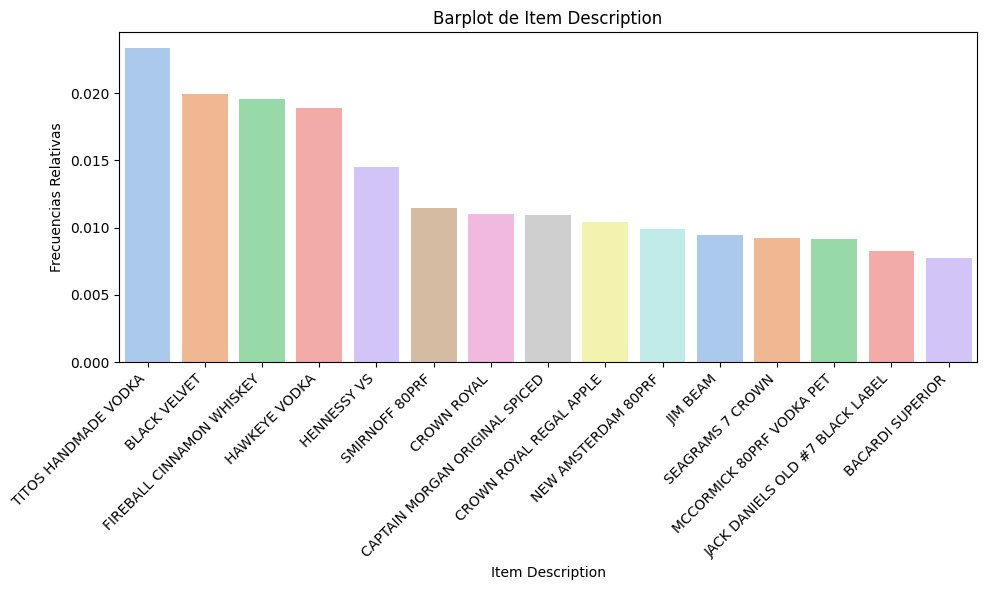

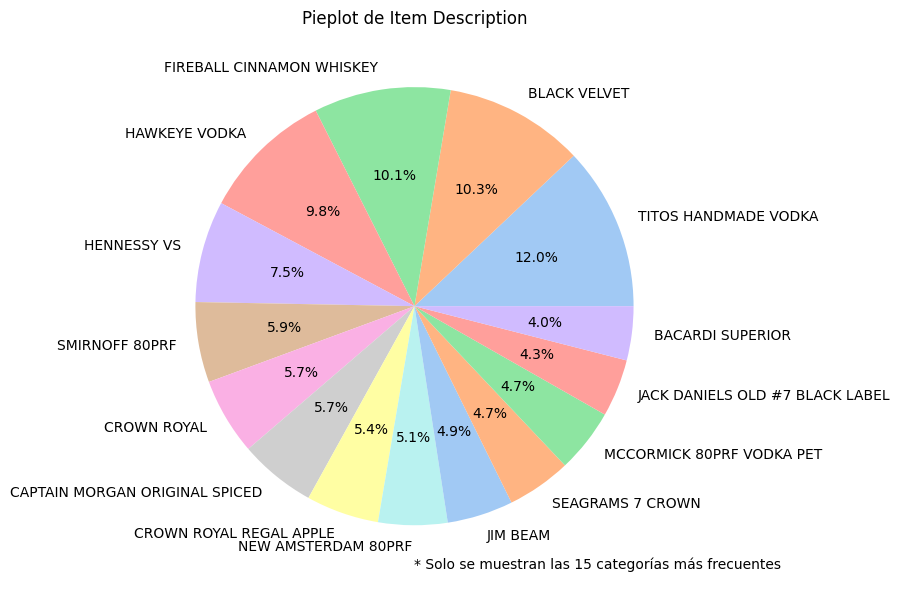

In [17]:
# Gráficos y tablas de frecuencias de todas las variables cualitativas:

print("\n--- Frecuencias columnas categoricas ---")
for i in cat_columns:
    print("*************************************************")
    print("Variable = "+i)
    print("*************************************************")
    
    # 1. La tabla de frecuencias de la variable i
    pct = pd.DataFrame(df_filtrado[i].value_counts(normalize=True))
    pct.columns = ['Frecuencias Relativas']
    pct["Frecuencias Absolutas"] = df_filtrado[i].value_counts()
    print(pct)
    
    # Limitamos a las 10 categorías más frecuentes si hay más de 10
    n = 15 # Numero de categorias a mostrar
    if len(pct) > n:
        pct = pct.head(n)
        other_label = 'Otros'
    else:
        other_label = None
    
    # 2. Barplot de la variable i
    colors = sns.color_palette('pastel')[:n]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=pct.index, y='Frecuencias Relativas',palette=colors, data=pct)
    plt.title(f'Barplot de {i}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # 3. Pieplot de la variable i
    frec_abs = pct['Frecuencias Absolutas']
    labels = pct.index
    
    colors = sns.color_palette('pastel')[:len(labels)]
    plt.figure(figsize=(10, 6))
    plt.pie(frec_abs, labels=labels, colors=colors, autopct='%.1f%%')
    plt.title(f'Pieplot de {i}')
    if other_label:
        plt.text(0, -1.2, f'* Solo se muestran las {n} categorías más frecuentes', fontsize=10)
    plt.tight_layout()
    plt.show()

### Análisis Comportamientos Condado POLK

In [25]:
# Filtrar condado Polk

df_polk = df_filtrado[df_filtrado['County']=='POLK']
df_polk.drop('County', axis=1, inplace=True)
print(df_polk.shape)
df_polk.head(2)

(1922221, 13)


,Date,Store Name,Category Name,Vendor Name,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
3,2019-06-12,HY-VEE / WINDSOR HEIGHTS,IMPORTED BRANDIES,MOET HENNESSY USA,HENNESSY VS,24,200,6.24,9.36,3,28.08,0.60,0.15
4,2019-04-18,HY-VEE FOOD STORE #3 / DES MOINES,IRISH WHISKIES,PERNOD RICARD USA,JAMESON,6,1750,32.48,48.72,6,283.32,10.50,2.77



--- Análisis de ventas ---


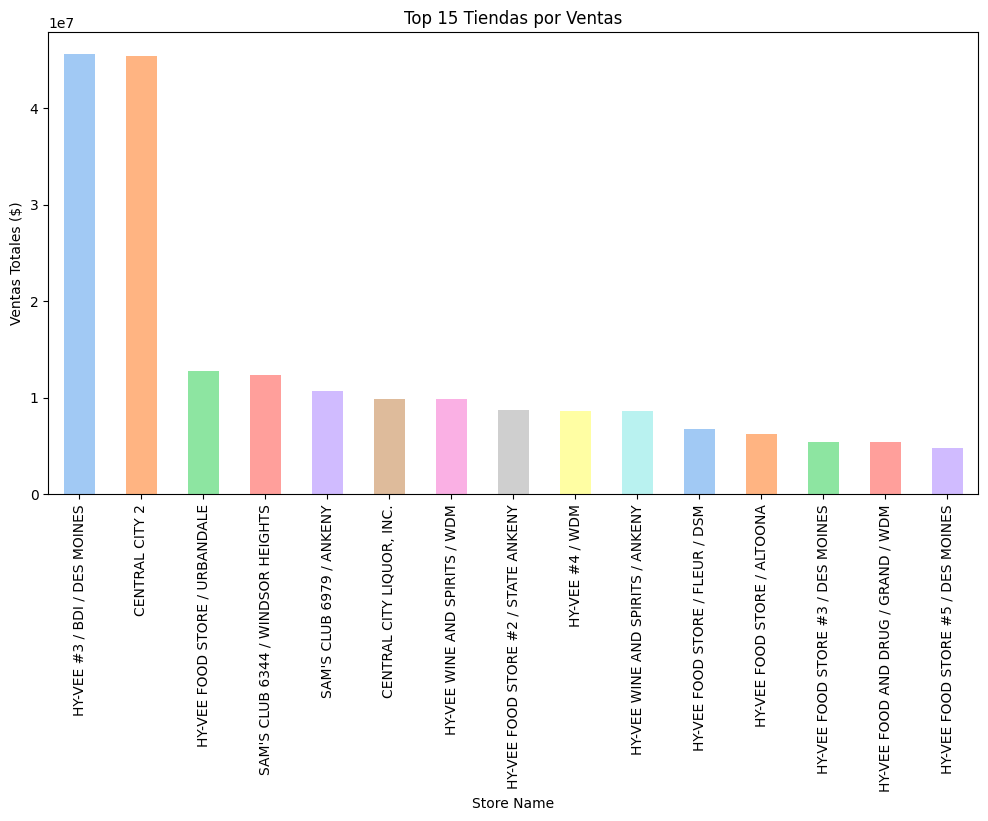

In [21]:
# Análisis de ventas
print("\n--- Análisis de ventas ---")
plt.figure(figsize=(12, 6))
df_polk.groupby('Store Name')['Sale (Dollars)'].sum().sort_values(ascending=False).head(15).plot(kind='bar',color=colors)
plt.title('Top 15 Tiendas por Ventas')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()


--- Análisis temporal ---


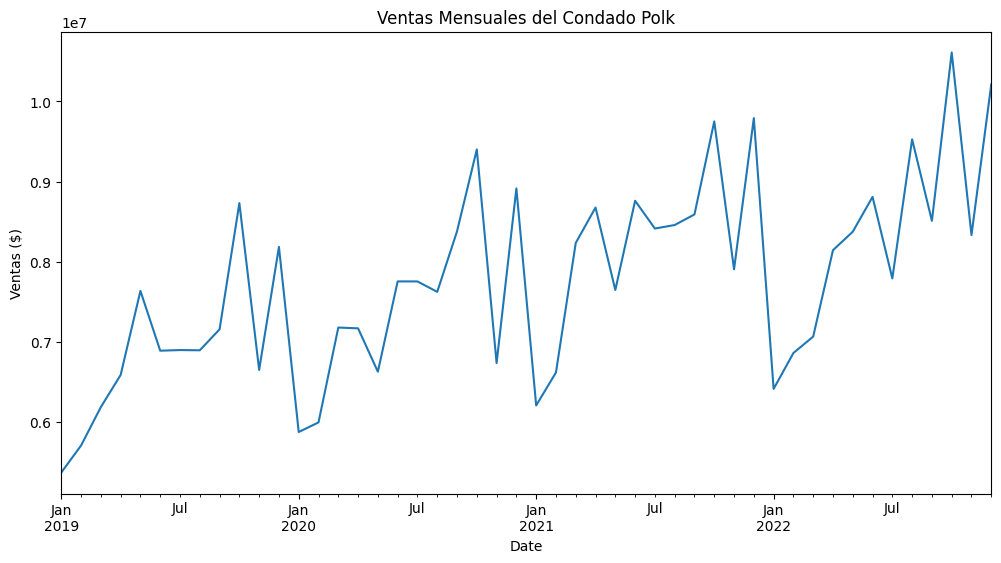

In [28]:
# Análisis temporal
print("\n--- Análisis temporal ---")
df_polk.set_index('Date', inplace=True)
monthly_sales = df_polk.resample('M')['Sale (Dollars)'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Ventas Mensuales del Condado Polk')
plt.ylabel('Ventas ($)')
plt.show()


--- Relación entre variables ---


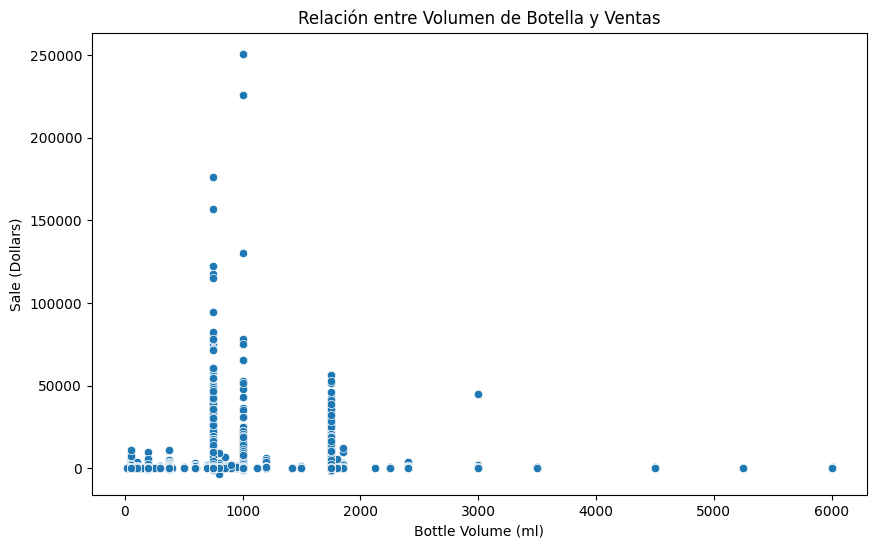

In [29]:
# Relación entre variables Volumen de Botella y Ventas
print("\n--- Relación entre variables ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='Sale (Dollars)', data=df_polk)
plt.title('Relación entre Volumen de Botella y Ventas')
plt.show()


--- Análisis por categoría ---


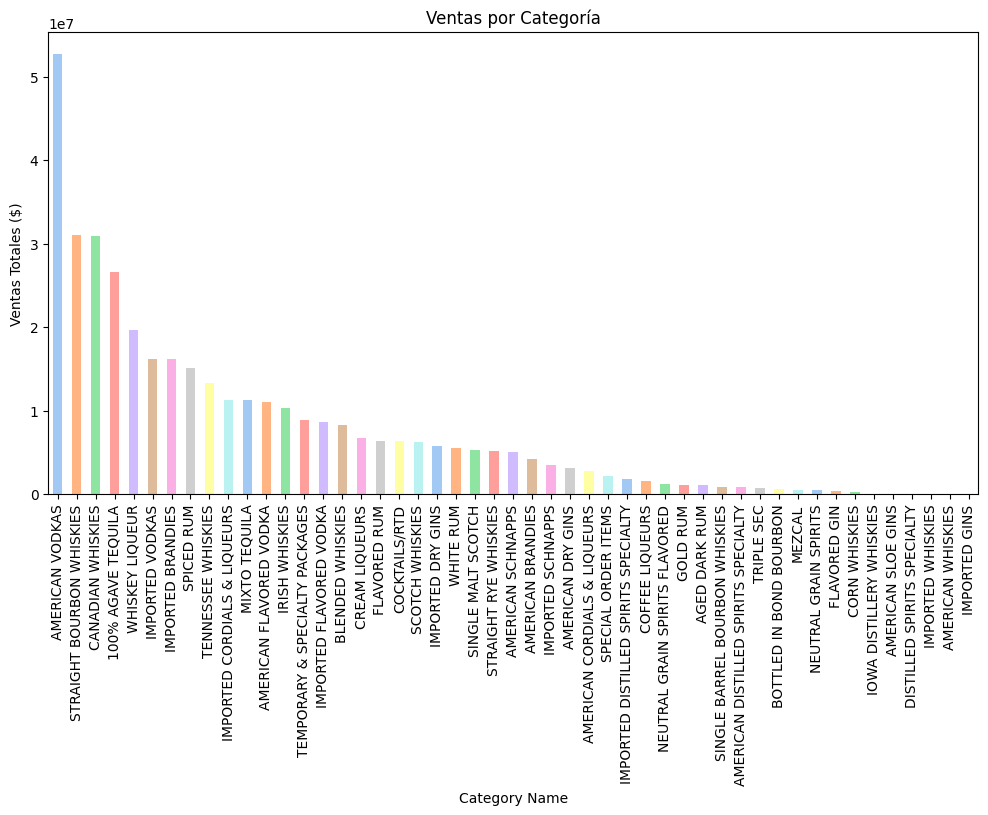

In [30]:
# Análisis por categoría
print("\n--- Análisis por categoría ---")
plt.figure(figsize=(12, 6))
df_polk.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).plot(kind='bar',color=colors)
plt.title('Ventas por Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()

In [34]:
# Análisis de margen
print("\n--- Análisis de margen ---")
df_polk['Margen'] = (df_polk['State Bottle Retail'] - df_polk['State Bottle Cost']) / df_polk['State Bottle Cost']

print("\nEstadísticas de Margen:")
print(df_polk['Margen'].describe())


--- Análisis de margen ---

Estadísticas de Margen:
count   1922221.00
mean          0.50
std           0.01
min          -0.87
25%           0.50
50%           0.50
75%           0.50
max           5.69
Name: Margen, dtype: float64



--- Eficiencia de ventas ---


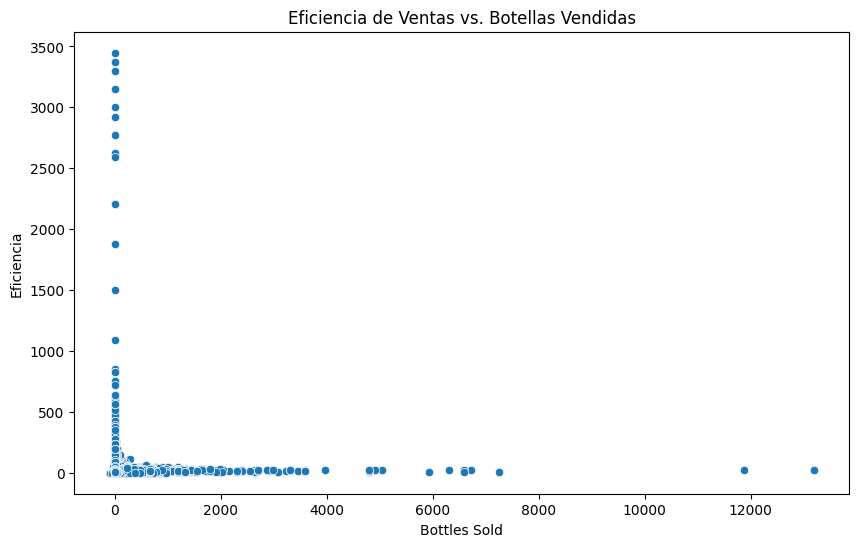

In [35]:
# Eficiencia de ventas
print("\n--- Eficiencia de ventas ---")
df_polk['Eficiencia'] = df_polk['Sale (Dollars)'] / df_polk['Bottles Sold']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottles Sold', y='Eficiencia', data=df_polk)
plt.title('Eficiencia de Ventas vs. Botellas Vendidas')
plt.show()


--- Análisis por categoría ---


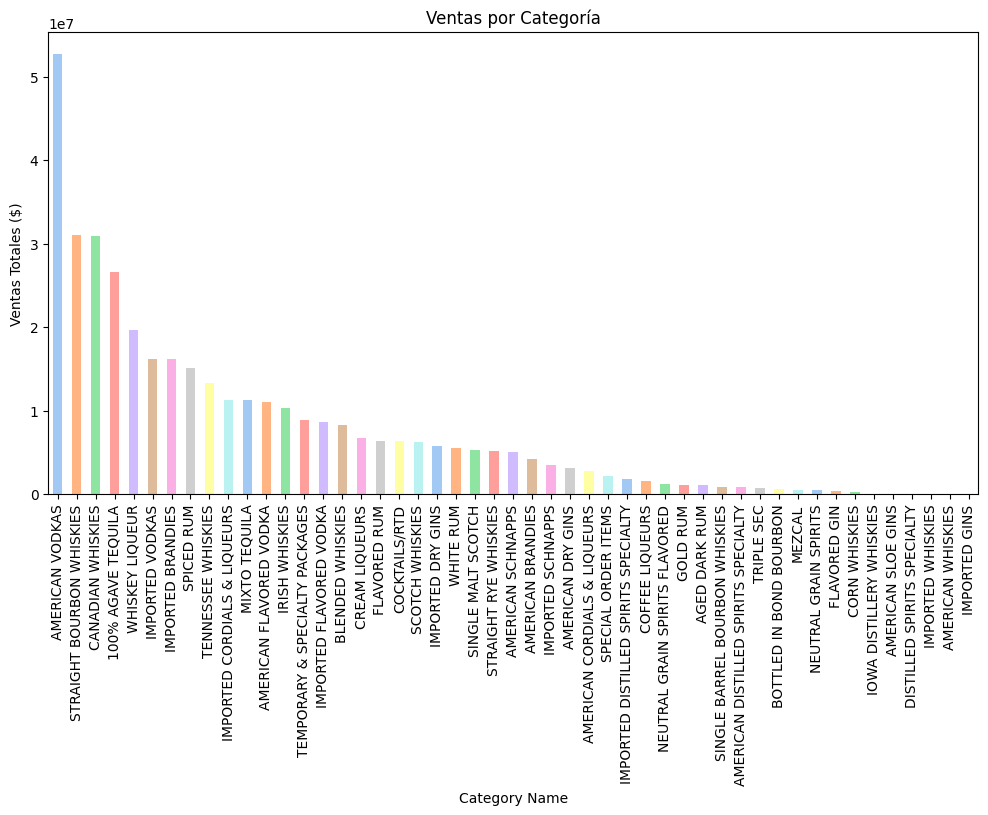

In [39]:
# Análisis por categoría
print("\n--- Análisis por categoría ---")
plt.figure(figsize=(12, 6))
df_polk.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending=False).plot(kind='bar', color =colors)
plt.title('Ventas por Categoría')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=90)
plt.show()


--- Análisis detallado de Outliers ---

Análisis de outliers para Sale (Dollars):
Número de outliers: 134304
Porcentaje de outliers: 6.99%
Rango de valores normales: -157.50 - 382.50

Estadísticas de los outliers:
count   134304.00
mean      1312.88
std       2884.42
min      -3375.00
25%        486.00
50%        652.32
75%       1170.00
max     250932.00
Name: Sale (Dollars), dtype: float64


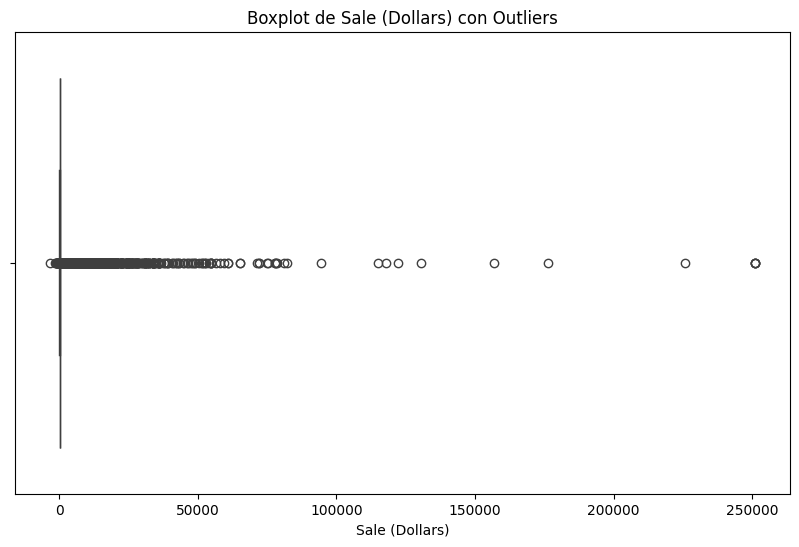

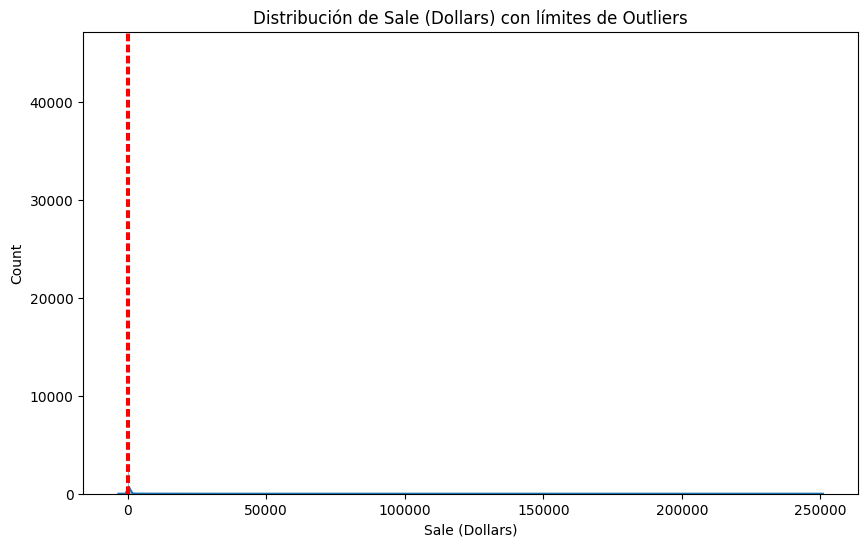


Análisis de outliers para Bottles Sold:
Número de outliers: 131774
Porcentaje de outliers: 6.86%
Rango de valores normales: -10.50 - 25.50

Estadísticas de los outliers:
count   131774.00
mean        94.12
std        157.49
min        -96.00
25%         48.00
50%         48.00
75%         96.00
max      13200.00
Name: Bottles Sold, dtype: float64


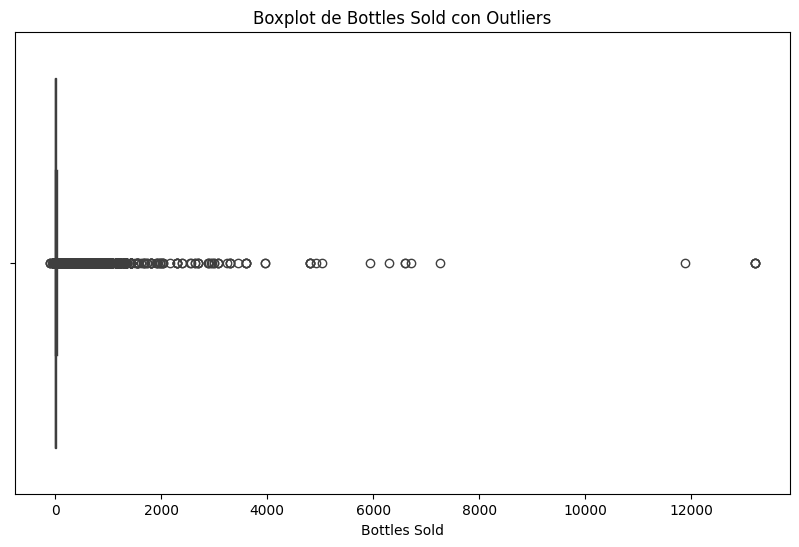

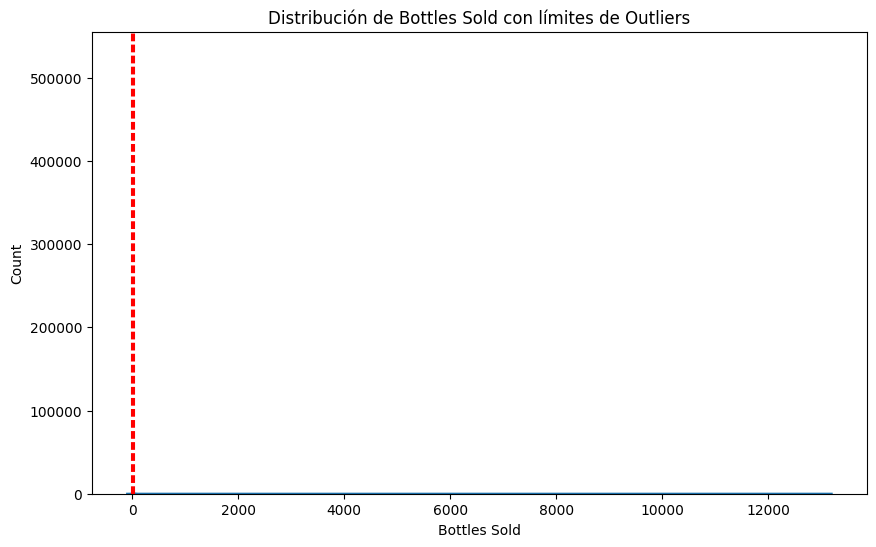


Análisis de outliers para Volume Sold (Liters):
Número de outliers: 143326
Porcentaje de outliers: 7.46%
Rango de valores normales: -9.75 - 20.25

Estadísticas de los outliers:
count   143326.00
mean        69.88
std        159.45
min        -63.00
25%         24.00
50%         33.60
75%         60.00
max      13200.00
Name: Volume Sold (Liters), dtype: float64


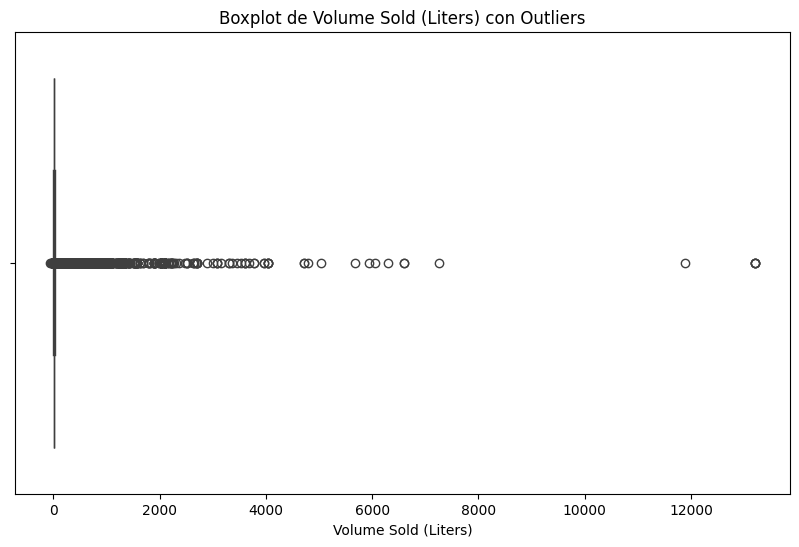

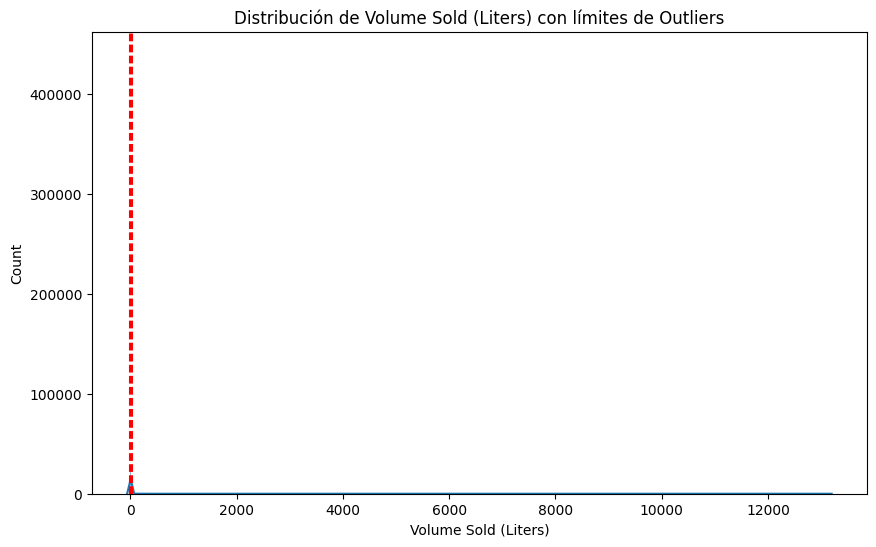


Análisis de outliers para State Bottle Cost:
Número de outliers: 105038
Porcentaje de outliers: 5.46%
Rango de valores normales: -7.75 - 27.85

Estadísticas de los outliers:
count   105038.00
mean        41.77
std         38.36
min         27.97
25%         30.00
50%         32.50
75%         44.00
max       2298.84
Name: State Bottle Cost, dtype: float64


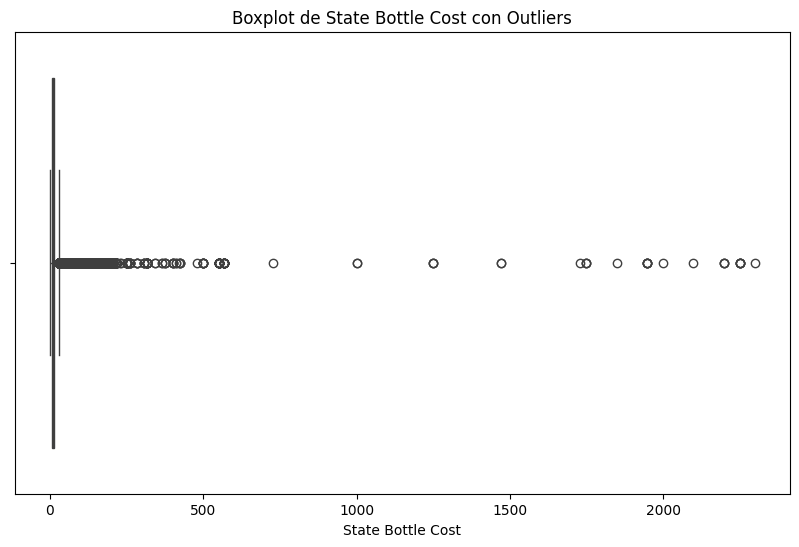

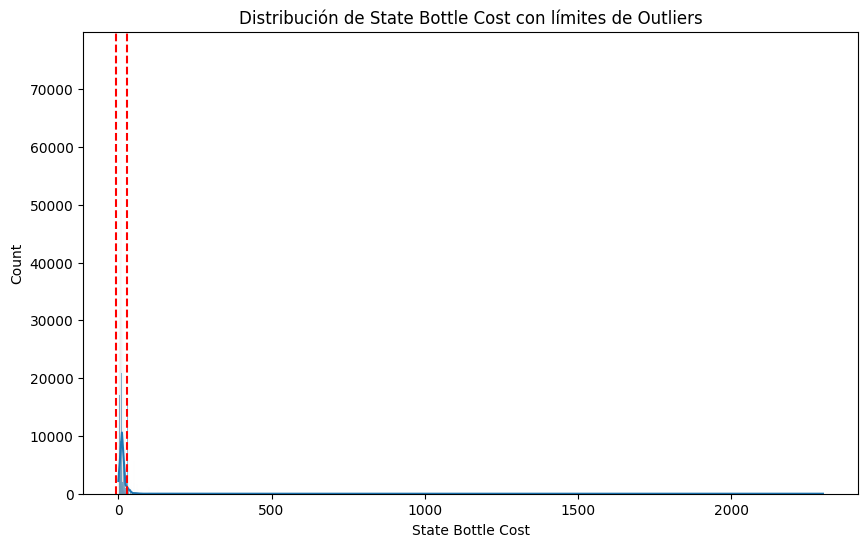


Análisis de outliers para State Bottle Retail:
Número de outliers: 105036
Porcentaje de outliers: 5.46%
Rango de valores normales: -11.62 - 41.77

Estadísticas de los outliers:
count   105036.00
mean        62.66
std         57.53
min         41.96
25%         45.00
50%         48.75
75%         66.00
max       3448.26
Name: State Bottle Retail, dtype: float64


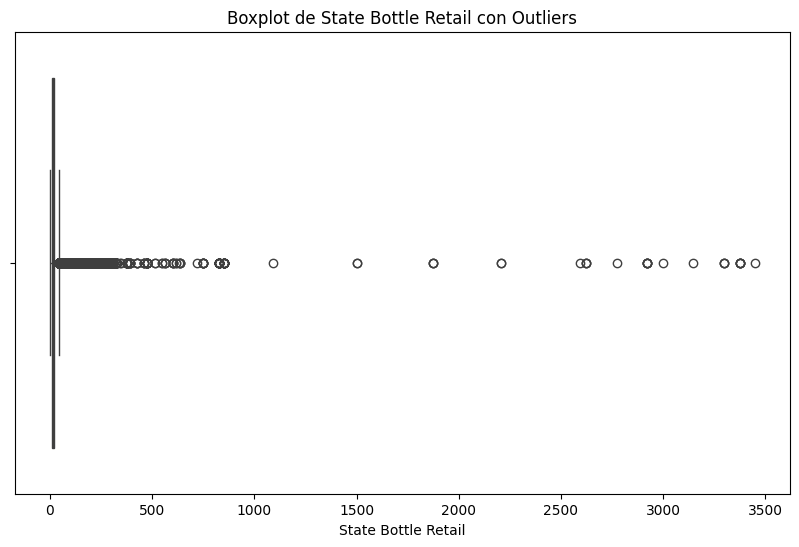

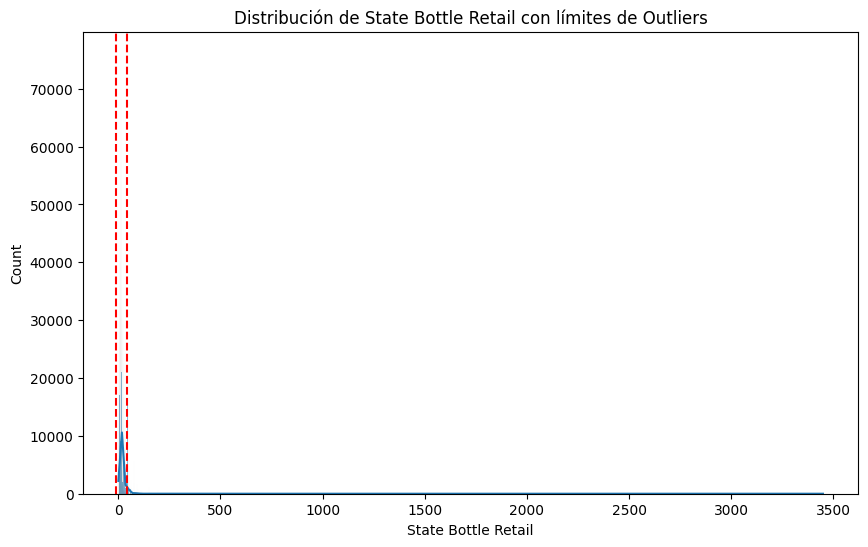

In [40]:
# Análisis de outliers
print("\n--- Análisis detallado de Outliers ---")

def analyze_outliers(df, column):
    # Calculamos los límites para los outliers usando el método IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificamos los outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Imprimimos estadísticas sobre los outliers
    print(f"\nAnálisis de outliers para {column}:")
    print(f"Número de outliers: {len(outliers)}")
    print(f"Porcentaje de outliers: {len(outliers) / len(df) * 100:.2f}%")
    print(f"Rango de valores normales: {lower_bound:.2f} - {upper_bound:.2f}")
    
    if len(outliers) > 0:
        print("\nEstadísticas de los outliers:")
        print(outliers[column].describe())
        
        # Visualizamos los outliers con un boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Boxplot de {column} con Outliers')
        plt.show()
        
        # Visualizamos la distribución con los límites de outliers
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.axvline(lower_bound, color='r', linestyle='--')
        plt.axvline(upper_bound, color='r', linestyle='--')
        plt.title(f'Distribución de {column} con límites de Outliers')
        plt.show()

# Analizamos outliers para columnas numéricas relevantes
numeric_columns = ['Sale (Dollars)', 'Bottles Sold', 'Volume Sold (Liters)', 
                   'State Bottle Cost', 'State Bottle Retail']

for col in numeric_columns:
    analyze_outliers(df_polk, col)


In [41]:
# Impacto de los outliers en las estadísticas
print("\n--- Impacto de los outliers en las estadísticas ---")

def stats_with_without_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_without_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    print(f"\nEstadísticas para {column}:")
    print("Con outliers:")
    print(df[column].describe())
    print("\nSin outliers:")
    print(df_without_outliers[column].describe())

for col in numeric_columns:
    stats_with_without_outliers(df_polk, col)



--- Impacto de los outliers en las estadísticas ---

Estadísticas para Sale (Dollars):
Con outliers:
count   1922221.00
mean        193.45
std         825.93
min       -3375.00
25%          45.00
50%          94.20
75%         180.00
max      250932.00
Name: Sale (Dollars), dtype: float64

Sin outliers:
count   1787917.00
mean        109.37
std          85.04
min        -157.50
25%          41.75
50%          86.76
75%         157.32
max         382.50
Name: Sale (Dollars), dtype: float64

Estadísticas para Bottles Sold:
Con outliers:
count   1922221.00
mean         13.91
std          47.00
min         -96.00
25%           3.00
50%           6.00
75%          12.00
max       13200.00
Name: Bottles Sold, dtype: float64

Sin outliers:
count   1790447.00
mean          8.01
std           6.13
min         -10.00
25%           3.00
50%           6.00
75%          12.00
max          25.00
Name: Bottles Sold, dtype: float64

Estadísticas para Volume Sold (Liters):
Con outliers:
count   192222


--- Patrones de venta por día de la semana ---


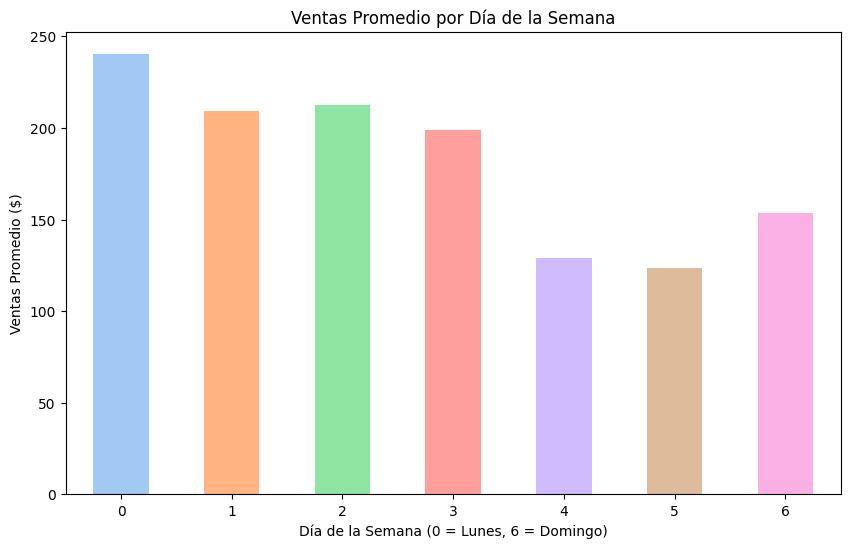

In [48]:
# Patrones de venta por día de la semana
print("\n--- Patrones de venta por día de la semana ---")
df_polk['Dia_Semana'] = df_polk.index.dayofweek
ventas_por_dia = df_polk.groupby('Dia_Semana')['Sale (Dollars)'].mean()
plt.figure(figsize=(10, 6))
ventas_por_dia.plot(kind='bar', color=colors)
plt.title('Ventas Promedio por Día de la Semana')
plt.xlabel('Día de la Semana (0 = Lunes, 6 = Domingo)')
plt.ylabel('Ventas Promedio ($)')
plt.xticks(rotation=0)
plt.show()


--- Análisis de la relación precio-volumen ---


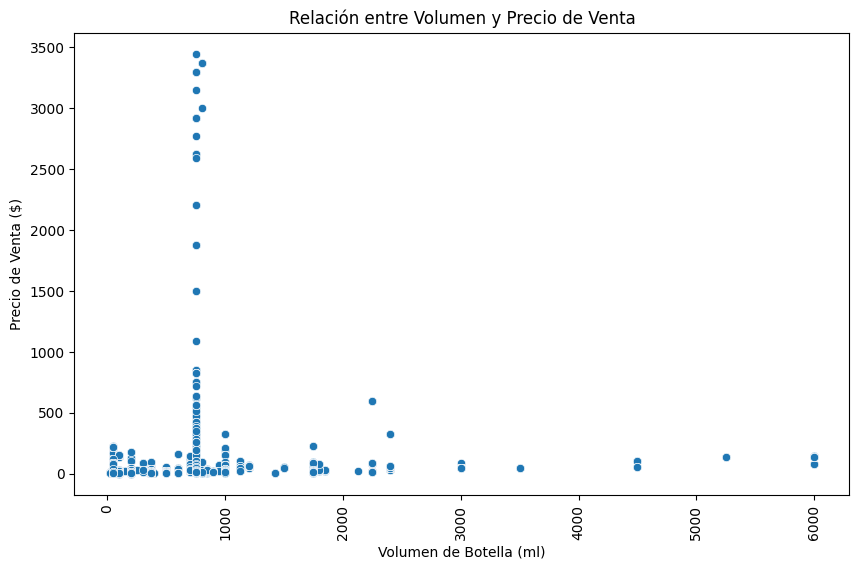

In [45]:
# Análisis de la relación precio-volumen
print("\n--- Análisis de la relación precio-volumen ---")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Bottle Volume (ml)', y='State Bottle Retail', data=df_polk)
plt.title('Relación entre Volumen y Precio de Venta')
plt.xlabel('Volumen de Botella (ml)')
plt.ylabel('Precio de Venta ($)')
plt.show()